# Example 2.6
A sieve analysis was conducted on a soil producing the data shown in the table below. Calculate (i) the retained weights, (ii) Percentage retained, (iii) Percentage passing, (iv) the gravel, sand, and fine fractions, (v) and plot the grain size distribution.

## Data:

Sieve analysis results given in table

## Principles

$W_{ri}=\sum_{k=1}^{k=i}
W_k$

$P_{Ri}=\cfrac{W_{ri}}{W_{td}} \times 100$

$P_{Pi}=100-P_{Ri}$

$S_F=100-G_F-F_F$

In [2]:
# first I will import the packages
import pandas as pd #great for managing ordered data (things you would do with excel)
import numpy as np
import Soilved as slv

In [3]:
#I need to load my data and we can do than from any type of file 
# I am using a text delimited by commas or csv file (you can easily make one using excel)

GSD_data=pd.read_csv('./data/mod2example6.csv') #reads csv file
GSD_data #shows dataframe


,d,Ws (gr)
0,4.75,12.50
1,2,233.67
2,0.85,144.13
3,0.425,75.75
4,0.25,25.47
5,0.15,10.14
6,0.106,5.50
7,0.075,1.70
8,Pan,1.00
9,Total,509.86


**Note**: The dataset is now a pandas dataframe and has the headers as indices of the columns 

In [4]:
GSD_data['d'] #retrieves the particle size column

0     4.75
1        2
2     0.85
3    0.425
4     0.25
5     0.15
6    0.106
7    0.075
8      Pan
9    Total
Name: d, dtype: object

In [5]:
GSD_data['d'][:-2] #removing the two last rows|

0     4.75
1        2
2     0.85
3    0.425
4     0.25
5     0.15
6    0.106
7    0.075
Name: d, dtype: object

In [6]:
slv.GetPercentCoarser(GSD_data) #calculates percentage coarser or retained
GSD_data

c:\Users\$r.984804\Documents\GitHub\soilved\content\Soilved.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSD_data['Retained'][i]=W*100/Wtd


,d,Ws (gr),Retained
0,4.75,12.50,2.451653
1,2,233.67,48.281881
2,0.85,144.13,76.550426
3,0.425,75.75,91.407445
4,0.25,25.47,96.402934
5,0.15,10.14,98.391715
6,0.106,5.50,99.470443
7,0.075,1.70,99.803868
8,Pan,1.00,100.000000
9,Total,509.86,200.000000


In [7]:
GSD_data['Passing']=100-GSD_data['Retained'] #Percentage finer
GSD_data

,d,Ws (gr),Retained,Passing
0,4.75,12.50,2.451653,9.754835e+01
1,2,233.67,48.281881,5.171812e+01
2,0.85,144.13,76.550426,2.344957e+01
3,0.425,75.75,91.407445,8.592555e+00
4,0.25,25.47,96.402934,3.597066e+00
5,0.15,10.14,98.391715,1.608285e+00
6,0.106,5.50,99.470443,5.295571e-01
7,0.075,1.70,99.803868,1.961323e-01
8,Pan,1.00,100.000000,1.421085e-14
9,Total,509.86,200.000000,-1.000000e+02


In [8]:
G_F=GSD_data['Retained'][0] #gravel fraction is the percent coarser than N4
print("G_F= %1.2f percent" %G_F)

G_F= 2.45 percent


In [9]:
F_F=GSD_data['Passing'][7] #fine fraction is the percent finer than N4
print("F_F= %1.2f percent" %F_F)

F_F= 0.20 percent


In [10]:
S_F=100-G_F-F_F # Sand fraction in percent
print("S_F= %1.2f percent" %S_F) 

S_F= 97.35 percent


In [11]:
import matplotlib.pyplot as plt #graphic functions library

<ipython-input-13-38edb275909f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(D.astype(np.float), GSD_data['Passing'][:-2], '*-') #string array to float


Text(0.5, 0, 'Particle size [mm]')

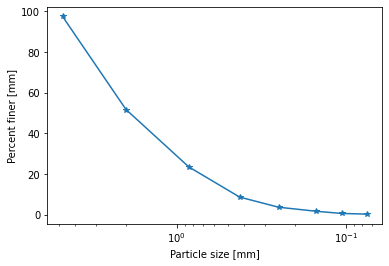

In [13]:
D=np.array(GSD_data['d'][:-2]) #transforms strings to array
plt.plot(D.astype(np.float), GSD_data['Passing'][:-2], '*-') #string array to float
plt.xscale('log')
plt.gca().invert_xaxis()
plt.ylabel(r'Percent finer [mm]')
plt.xlabel(r'Particle size [mm]')